# Lesson: CLUSTERING - Modeling
<a href = "https://www.canva.com/design/DAFjMCR_7wg/Ixd3ONOru1f5C7VLTb1xCQ/view?utm_content=DAFjMCR_7wg&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink"> 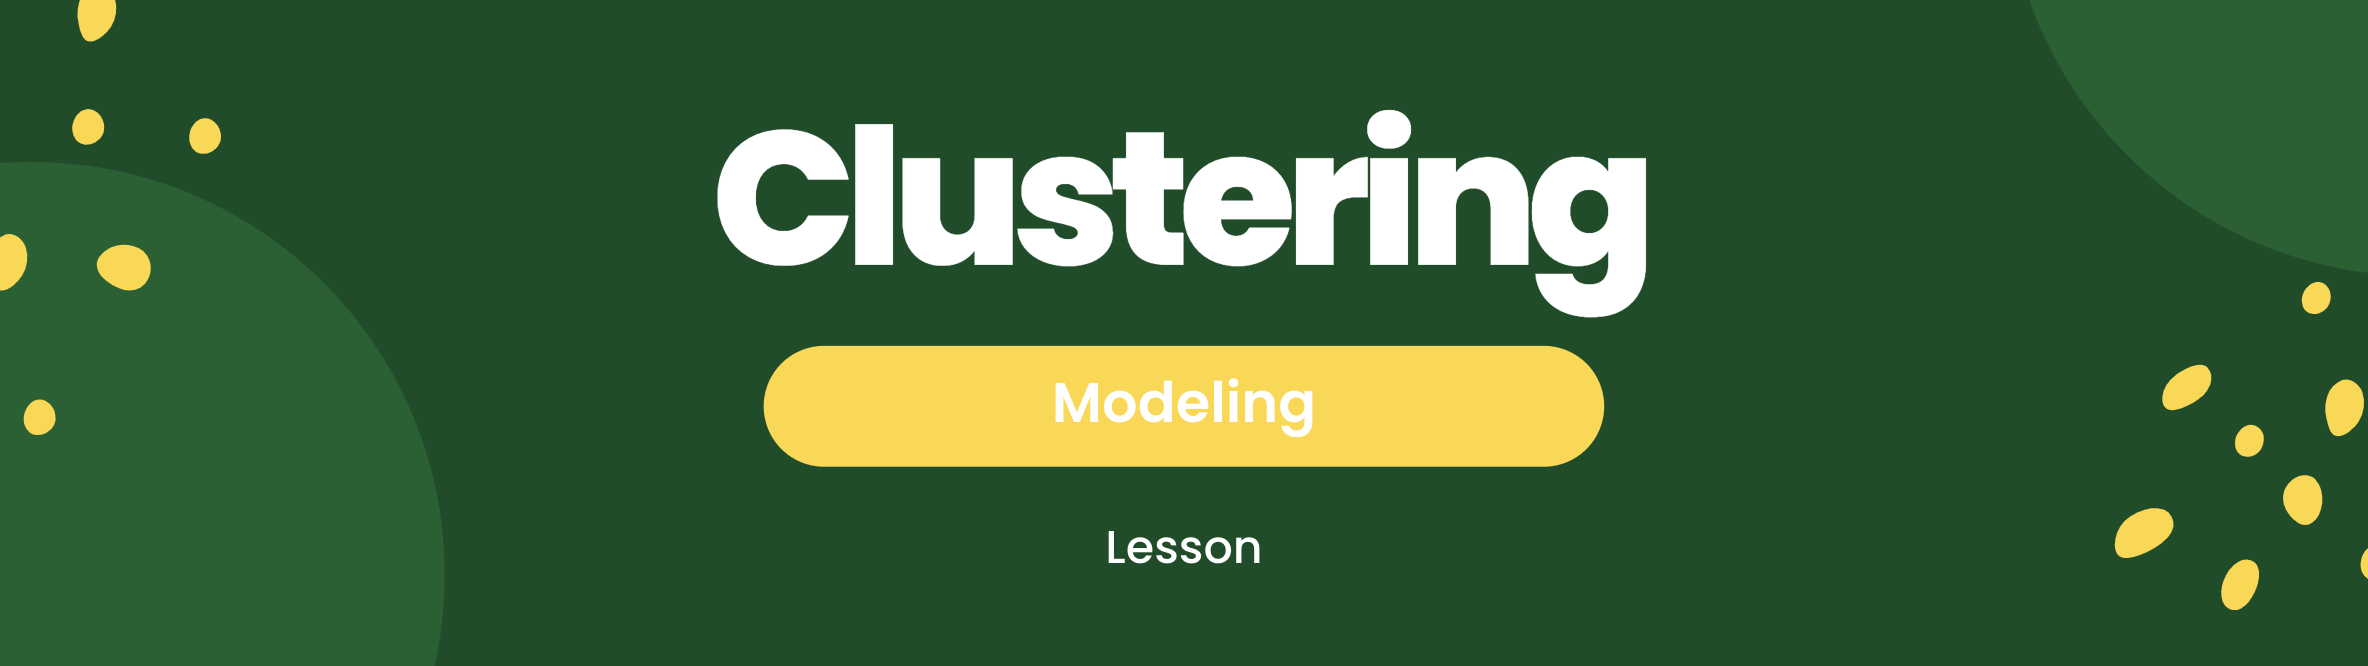</a>



<hr style="border:2px solid gray">

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from pydataset import data

# module for visualizations
import viz_kmeans


# Data Acquisition

In [2]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


# Data Preparation

#### *Let's fix the column names by making everything lower case and replacing the dot separator with an underscore*

In [3]:
new_col_name = []

for col in df.columns:
    new_col_name.append(col.lower().replace('.', '_'))

df.columns = new_col_name

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
# define independent variables for k-means

X = df[['petal_length', 'sepal_length']]
X.head()

,petal_length,sepal_length
1,1.4,5.1
2,1.4,4.9
3,1.3,4.7
4,1.5,4.6
5,1.4,5.0


# Modeling

### Create and Fit cluster model

In [5]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

### Add cluster to our original data

In [6]:
# make a new column names cluster in iris and X dataframe

df['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)

df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1


In [7]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
21,5.4,3.4,1.7,0.2,setosa,1
25,4.8,3.4,1.9,0.2,setosa,1
145,6.7,3.3,5.7,2.5,virginica,2
81,5.5,2.4,3.8,1.1,versicolor,0
91,5.5,2.6,4.4,1.2,versicolor,0
102,5.8,2.7,5.1,1.9,virginica,0
50,5.0,3.3,1.4,0.2,setosa,1
18,5.1,3.5,1.4,0.3,setosa,1
65,5.6,2.9,3.6,1.3,versicolor,0
100,5.7,2.8,4.1,1.3,versicolor,0


### Visualize Clusters

In [8]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,5.006,3.428,1.462,0.246,1.00
versicolor,5.936,2.770,4.260,1.326,0.18
virginica,6.588,2.974,5.552,2.026,1.48


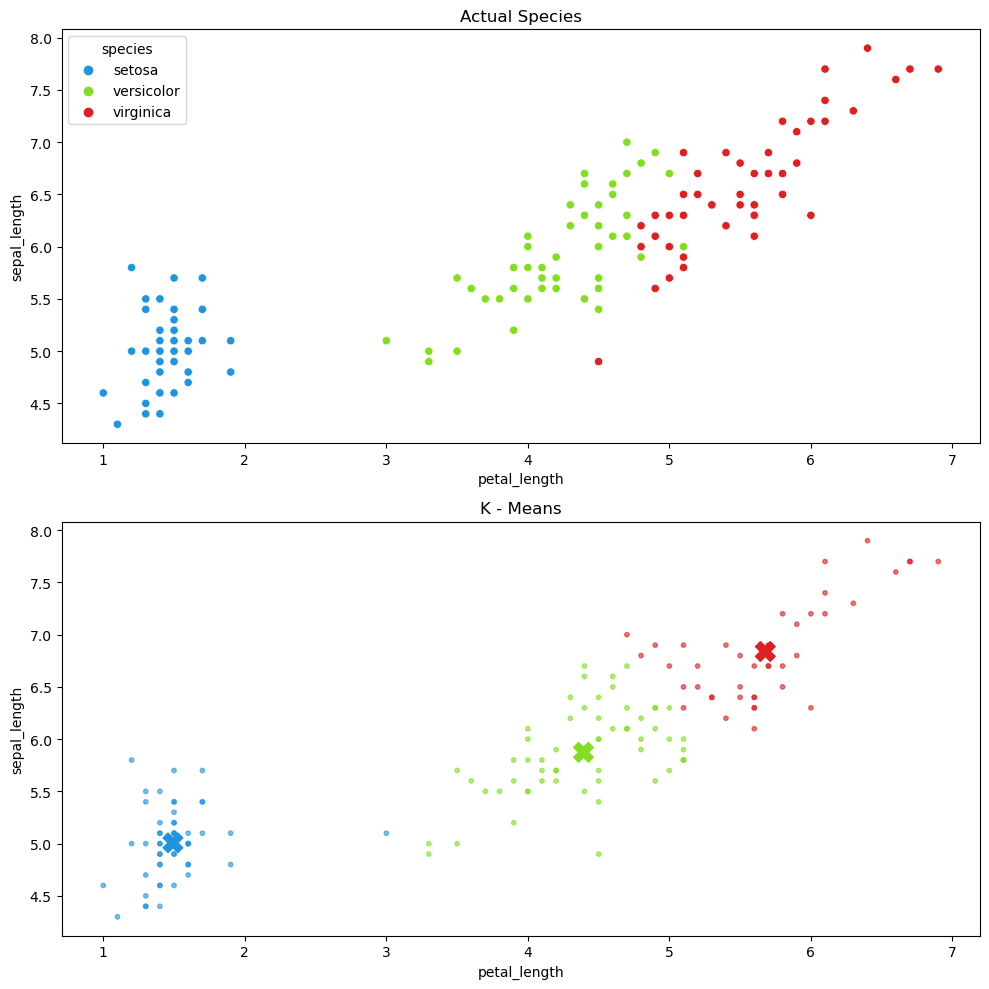

In [9]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(df)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">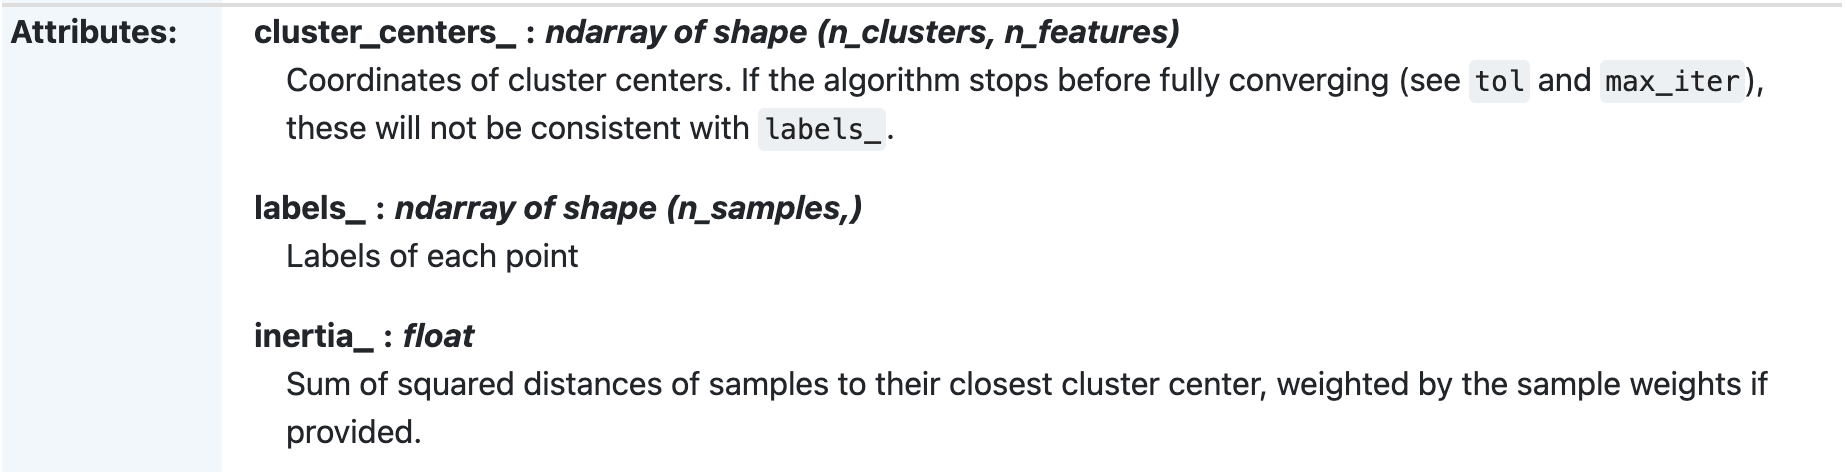</a>

In [10]:
# Cluster Centers aka centroids. -- The output is also not scaled; 
    # it would be scaled if the data used to fit was scaled.

kmeans.cluster_centers_

array([[4.39310345, 5.87413793],
       [1.49215686, 5.00784314],
       [5.67804878, 6.83902439]])

In [11]:
# Make a dataframe 

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns[:2])
centroids


,petal_length,sepal_length
0,4.393103,5.874138
1,1.492157,5.007843
2,5.678049,6.839024


In [12]:
#  Find the mean of the original df and groupby cluster

df.groupby('cluster')['petal_length', 'sepal_length'].mean()

,petal_length,sepal_length
cluster,,
0,4.393103,5.874138
1,1.492157,5.007843
2,5.678049,6.839024


In [13]:
# Labels (same as from predict) for each observation

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

**SNS NOTE:**

When `cluster` was an numeric column, sns automatically applied a sequential color palette by default. 

By converting `cluster` to a string column, sns recognized it as a **categorical** variable, allowing you to assign custom colors using a palette.

In [14]:
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_1
2,4.9,3.0,1.4,0.2,setosa,cluster_1
3,4.7,3.2,1.3,0.2,setosa,cluster_1
4,4.6,3.1,1.5,0.2,setosa,cluster_1
5,5.0,3.6,1.4,0.2,setosa,cluster_1


<Figure size 1400x900 with 0 Axes>

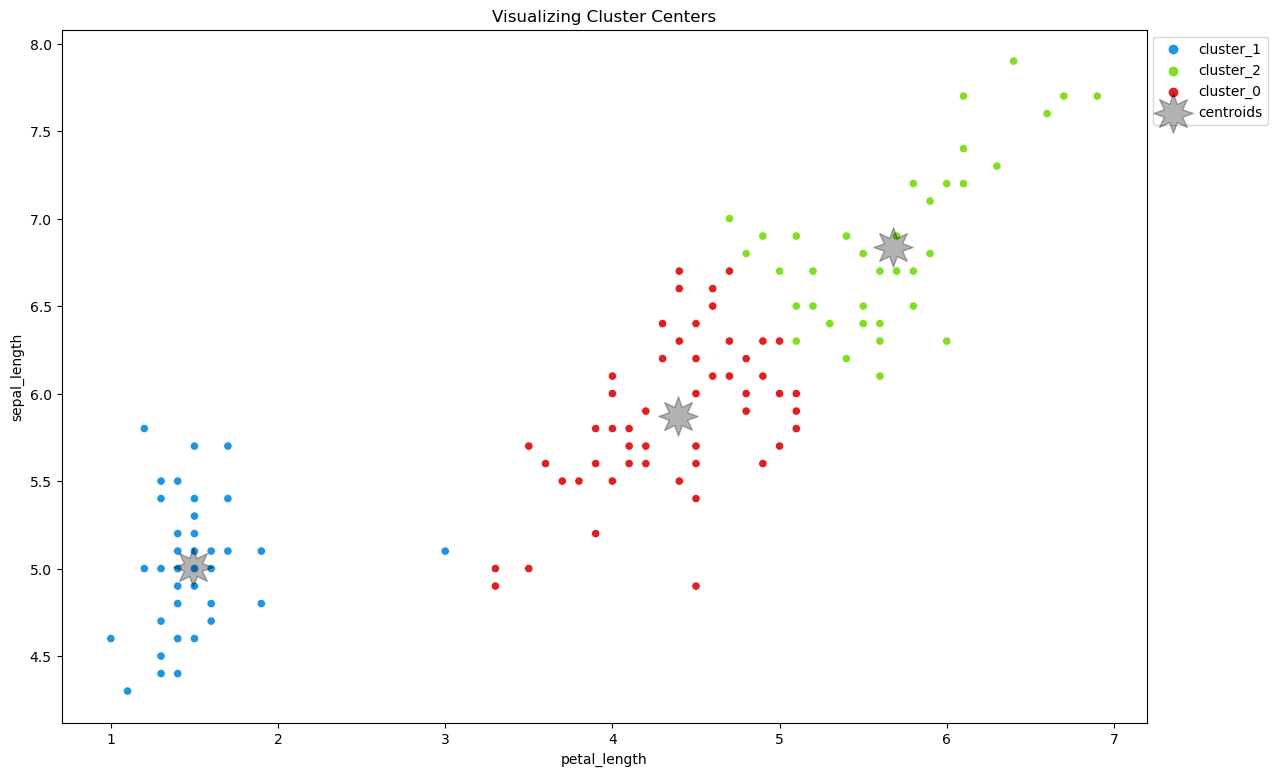

In [15]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))


# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_length', y = 'sepal_length', data = df, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'petal_length', y = 'sepal_length', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids')

plt.title('Visualizing Cluster Centers')

# Get unique cluster labels
unique_clusters = df['cluster'].unique()

# Create legend labels for clusters
cluster_labels = [f'Cluster {cluster}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');



## How to choose 'k'

#### *A priori* knowledge about application domain/educated guess
-  How many five different types of bacteria in the world (k = 5)
- There are two different kinds of people in world (k = 2)

#### Search for a 'good' k value
- Try different k values and evaluate results
    - *Inertia* = Within Cluster Sum of Squared (WCSS) distances from each point to it's assigned centroid  
        - minimize inertia
    - Use elbow method (using inertia) to choose k



In [16]:
kmeans.inertia_

53.809978644106934

In [17]:
k = 2

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
kmeans.inertia_

209.76498346625172

In [18]:
k = 3

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
kmeans.inertia_

53.809978644106934

In [19]:
k = 4

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
kmeans.inertia_

40.201304878048774

In [20]:
k = 5

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
kmeans.inertia_

26.776689655172415

In [21]:
k = 20

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
kmeans.inertia_

4.956320707070708

# Elbow Method:
1. Examine the resulting plot, looking for the "elbow" point, which is the value of k where the decrease in WCSS *starts to level off significantly*.

- The elbow point represents a trade-off between reducing the WCSS (increasing the number of clusters) and keeping the model simple.

- The elbow method provides a guideline to assist in selecting a suitable value for k, but it should be combined with *domain knowledge* and other evaluation metrics for a comprehensive analysis.

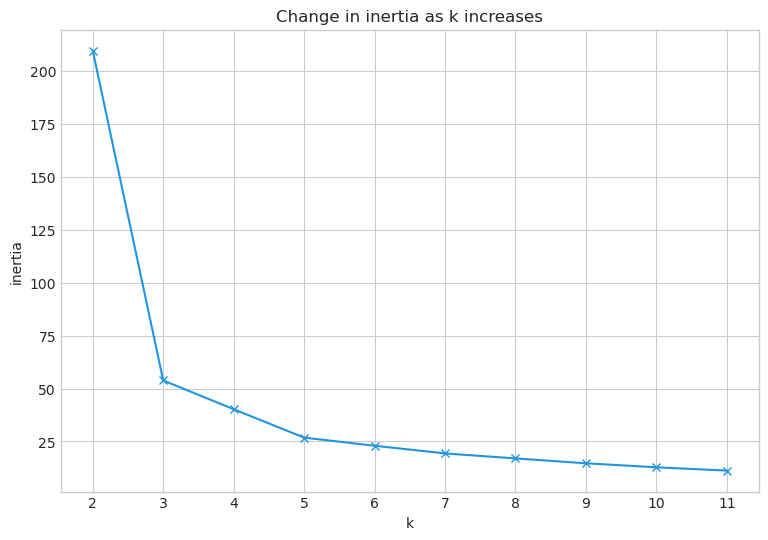

In [22]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

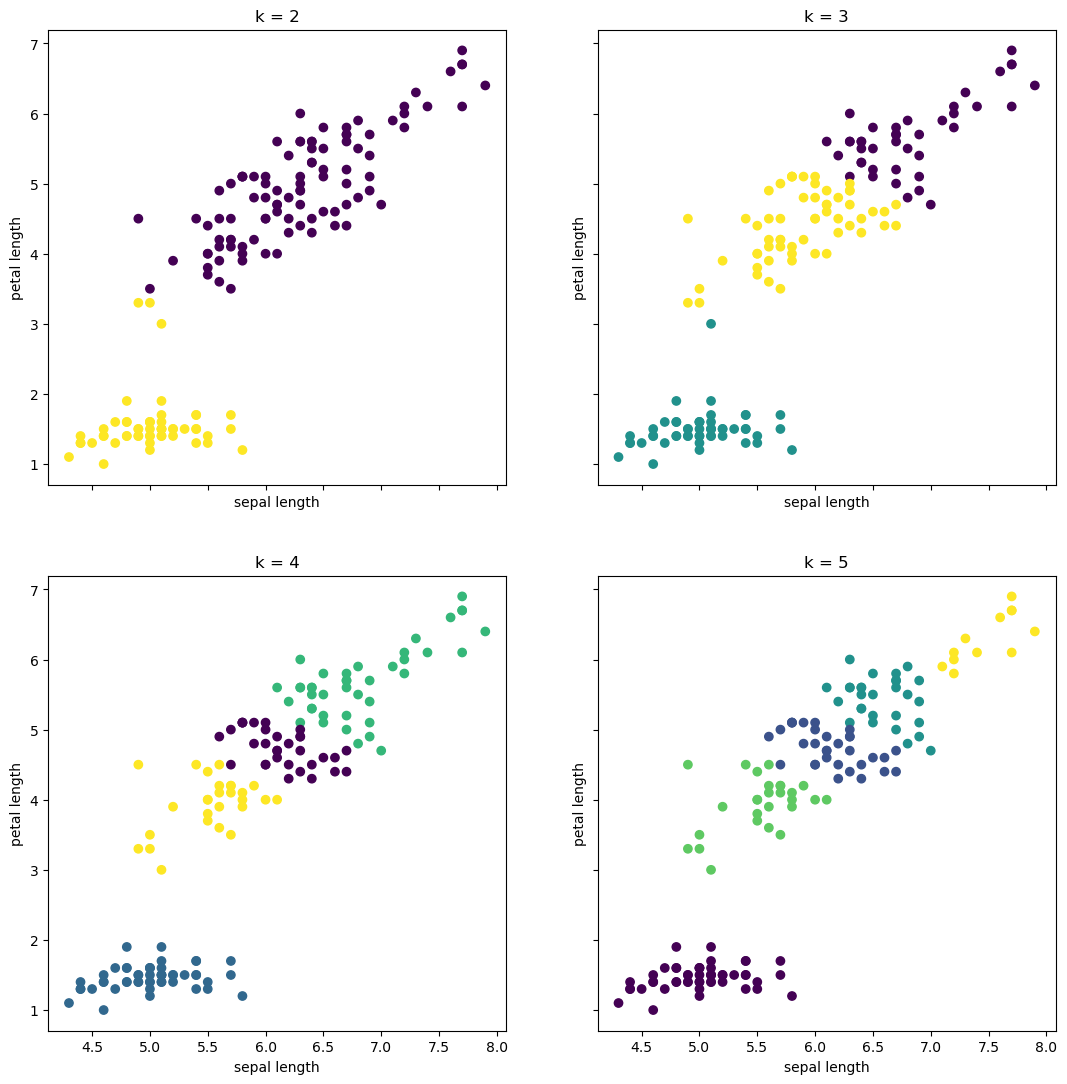

In [23]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    
    clusters = KMeans(k).fit(X).predict(X)
    
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')